## EDA y Transformacion de datos
En este notebook se tomaran los archivos json que se encuentran en la carpeta Fuente_json que contienen informacion sobre Bitcoin y se les realizaran las transformaciones necesarias y el analisis respectivo, luego de esto los dataframes resultantes se exportaran a archivos .xlsx los cualses quedan almacenados el la carpera Datos_Procesados en la subcarpeta respectiva.

Creacion de dataframe a partir del archivo fuente .json

In [43]:
import json
import pandas as pd

# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json\Bitcoin\coin_id_bitcoin.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un nuevo diccionario para almacenar los datos no anidados
flat_data = {
    'id': data['id'],
    'symbol': data['symbol'],
    'name': data['name'],
    'block_time_in_minutes': data['block_time_in_minutes'],
    'hashing_algorithm': data['hashing_algorithm'],
    'description': data['description']['en'],
    'homepage': ', '.join(data['links']['homepage']),
    'reddit_subscribers': data['community_data']['reddit_subscribers'],
    'twitter_followers': data['community_data']['twitter_followers'],
    'github_repos': ', '.join(data['links']['repos_url']['github']),
    'last_updated': data['last_updated']
}

# Crear un DataFrame a partir de los datos no anidados
coin_id_bitcoin1 = pd.DataFrame([flat_data])

# Imprimir el DataFrame
print(coin_id_bitcoin1)

        id symbol     name  block_time_in_minutes hashing_algorithm  \
0  bitcoin    btc  Bitcoin                     10           SHA-256   

                                         description  \
0  Bitcoin is the first successful internet money...   

                     homepage  reddit_subscribers  twitter_followers  \
0  http://www.bitcoin.org, ,              5703253            5961180   

                                        github_repos              last_updated  
0  https://github.com/bitcoin/bitcoin, https://gi...  2023-08-14T02:55:34.737Z  


hay columnas que no aportan valor para la clase de analisis que se va a realizar por lo que se eliminan estas columnas.

In [44]:
#Eliminar columnas
coin_id_bitcoin1.drop(['homepage',"github_repos","last_updated","description"] , axis=1, inplace=True)

In [45]:
print(coin_id_bitcoin1)

        id symbol     name  block_time_in_minutes hashing_algorithm  \
0  bitcoin    btc  Bitcoin                     10           SHA-256   

   reddit_subscribers  twitter_followers  
0             5703253            5961180  


## grafico
para las categorias de block_time_in_minutes','reddit_subscribers','twitter_followers'

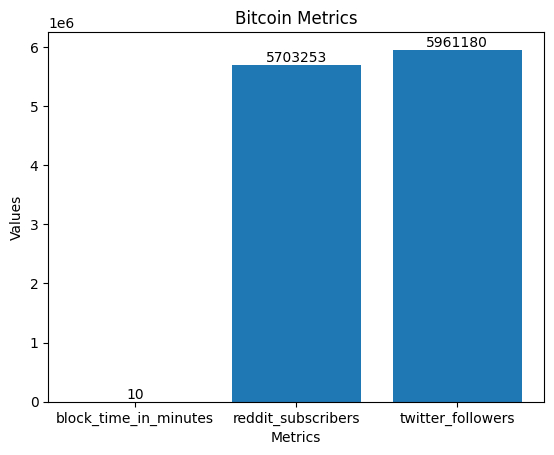

In [46]:
import matplotlib.pyplot as plt

# Datos del DataFrame
data = {
    'block_time_in_minutes': coin_id_bitcoin1['block_time_in_minutes'][0],
    'reddit_subscribers': coin_id_bitcoin1['reddit_subscribers'][0],
    'twitter_followers': coin_id_bitcoin1['twitter_followers'][0]
}

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras
bars = ax.bar(data.keys(), data.values())

# Agregar etiquetas de datos en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Configurar el título y etiquetas de los ejes
ax.set_title('Bitcoin Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Mostrar el gráfico
plt.show()

exportacion del dataframe a archivo .xlsx

In [47]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_bitcoin1.to_excel("..\Data\Datos_Procesados\Bitcoin\coin_id_bitcoin1.xlsx", sheet_name="coin_id_bitcoin1.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir del archivo fuente .json

In [48]:
# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json\Bitcoin\coin_id_bitcoin.json', 'r') as json_file:
    data = json.load(json_file)

# Función para aplanar diccionarios anidados
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Aplanar los datos anidados del JSON
flattened_data = flatten_dict(data)

# Crear un DataFrame a partir de los datos aplanados
coin_id_bitcoin2 = pd.DataFrame([flattened_data])

# Imprimir el DataFrame
print(coin_id_bitcoin2)

        id symbol     name asset_platform_id platforms_  \
0  bitcoin    btc  Bitcoin              None              

  detail_platforms__decimal_place detail_platforms__contract_address  \
0                            None                                      

   block_time_in_minutes hashing_algorithm                      categories  \
0                     10           SHA-256  [Layer 1 (L1), Cryptocurrency]   

   ... developer_data_pull_requests_merged  \
0  ...                               10864   

  developer_data_pull_request_contributors  \
0                                      834   

  developer_data_code_additions_deletions_4_weeks_additions  \
0                                               1119          

  developer_data_code_additions_deletions_4_weeks_deletions  \
0                                              -1085          

  developer_data_commit_count_4_weeks  \
0                                 210   

  developer_data_last_4_weeks_commit_activity_series  \


In [49]:
coin_id_bitcoin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 62 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         1 non-null      object 
 1   symbol                                                     1 non-null      object 
 2   name                                                       1 non-null      object 
 3   asset_platform_id                                          0 non-null      object 
 4   platforms_                                                 1 non-null      object 
 5   detail_platforms__decimal_place                            0 non-null      object 
 6   detail_platforms__contract_address                         1 non-null      object 
 7   block_time_in_minutes                                      1 non-null      int64  
 8   hashing_algori

Valores faltantes

In [50]:
missing_values = coin_id_bitcoin2.isnull().sum()
print(missing_values)

id                                                    0
symbol                                                0
name                                                  0
asset_platform_id                                     1
platforms_                                            0
                                                     ..
developer_data_last_4_weeks_commit_activity_series    0
public_interest_stats_alexa_rank                      0
public_interest_stats_bing_matches                    1
status_updates                                        0
last_updated                                          0
Length: 62, dtype: int64


Exportar dataframe a archivo .xlsx

In [51]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_bitcoin2.to_excel("..\Data\Datos_Procesados\Bitcoin\coin_id_bitcoin2.xlsx", sheet_name="coin_id_bitcoin2.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir de archivo fuente .json

In [52]:
with open('..\Data\Fuente_json\Bitcoin\coin_id_market_chart_bitcoin.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_market_chart_bitcoin= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_market_chart_bitcoin)


                         prices                         market_caps  \
0        [1367107200000, 135.3]         [1367107200000, 1500517590]   
1       [1367193600000, 141.96]         [1367193600000, 1575032004]   
2        [1367280000000, 135.3]         [1367280000000, 1501657493]   
3          [1367366400000, 117]         [1367366400000, 1298951550]   
4       [1367452800000, 103.43]         [1367452800000, 1148667722]   
...                         ...                                 ...   
3755  [1691712000000, 29423.82]  [1691712000000, 572414205818.4142]   
3756  [1691798400000, 29396.85]  [1691798400000, 571976559045.8302]   
3757  [1691884800000, 29412.14]  [1691884800000, 572257798803.9086]   
3758  [1691971200000, 29284.97]  [1691971200000, 569687130446.7833]   
3759  [1691983233000, 29339.63]  [1691983233000, 570845070370.0348]   

                           total_volumes  
0                     [1367107200000, 0]  
1                     [1367193600000, 0]  
2                 

tratamiento de columnas como listas

In [53]:
# Descomponer las listas en columnas separadas
coin_id_market_chart_bitcoin['timestamp'] = coin_id_market_chart_bitcoin['prices'].apply(lambda x: x[0])
coin_id_market_chart_bitcoin['price'] = coin_id_market_chart_bitcoin['prices'].apply(lambda x: x[1])
coin_id_market_chart_bitcoin['market_cap'] = coin_id_market_chart_bitcoin['market_caps'].apply(lambda x: x[1])
coin_id_market_chart_bitcoin['volume'] = coin_id_market_chart_bitcoin['total_volumes'].apply(lambda x: x[1])

# Convertir los valores a tipos de datos adecuados
coin_id_market_chart_bitcoin['timestamp'] = pd.to_datetime(coin_id_market_chart_bitcoin['timestamp'], unit='ms')
coin_id_market_chart_bitcoin['price'] = pd.to_numeric(coin_id_market_chart_bitcoin['price'])
coin_id_market_chart_bitcoin['market_cap'] = pd.to_numeric(coin_id_market_chart_bitcoin['market_cap'])
coin_id_market_chart_bitcoin['volume'] = pd.to_numeric(coin_id_market_chart_bitcoin['volume'])

# Eliminar las columnas originales de listas
coin_id_market_chart_bitcoin.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

# Mostrar el DataFrame modificado
print(coin_id_market_chart_bitcoin)

               timestamp     price    market_cap        volume
0    2013-04-28 00:00:00    135.30  1.500518e+09  0.000000e+00
1    2013-04-29 00:00:00    141.96  1.575032e+09  0.000000e+00
2    2013-04-30 00:00:00    135.30  1.501657e+09  0.000000e+00
3    2013-05-01 00:00:00    117.00  1.298952e+09  0.000000e+00
4    2013-05-02 00:00:00    103.43  1.148668e+09  0.000000e+00
...                  ...       ...           ...           ...
3755 2023-08-11 00:00:00  29423.82  5.724142e+11  8.106254e+09
3756 2023-08-12 00:00:00  29396.85  5.719766e+11  4.651950e+09
3757 2023-08-13 00:00:00  29412.14  5.722578e+11  3.994298e+09
3758 2023-08-14 00:00:00  29284.97  5.696871e+11  4.755220e+09
3759 2023-08-14 03:20:33  29339.63  5.708451e+11  8.147971e+09

[3760 rows x 4 columns]


transformacion de datos

In [54]:
# Convertir la columna 'timestamp' a tipo datetime
coin_id_market_chart_bitcoin['timestamp'] = pd.to_datetime(coin_id_market_chart_bitcoin['timestamp'])

# Obtener solo la fecha de la columna 'timestamp'
coin_id_market_chart_bitcoin['timestamp'] = coin_id_market_chart_bitcoin['timestamp'].dt.date

In [55]:
coin_id_market_chart_bitcoin

,timestamp,price,market_cap,volume
0,2013-04-28,135.30,1.500518e+09,0.000000e+00
1,2013-04-29,141.96,1.575032e+09,0.000000e+00
2,2013-04-30,135.30,1.501657e+09,0.000000e+00
3,2013-05-01,117.00,1.298952e+09,0.000000e+00
4,2013-05-02,103.43,1.148668e+09,0.000000e+00
...,...,...,...,...
3755,2023-08-11,29423.82,5.724142e+11,8.106254e+09
3756,2023-08-12,29396.85,5.719766e+11,4.651950e+09
3757,2023-08-13,29412.14,5.722578e+11,3.994298e+09
3758,2023-08-14,29284.97,5.696871e+11,4.755220e+09


In [56]:
# cambiar nombre columna
coin_id_market_chart_bitcoin.rename(columns={'timestamp': 'date'}, inplace=True)

In [57]:
print(coin_id_market_chart_bitcoin)

            date     price    market_cap        volume
0     2013-04-28    135.30  1.500518e+09  0.000000e+00
1     2013-04-29    141.96  1.575032e+09  0.000000e+00
2     2013-04-30    135.30  1.501657e+09  0.000000e+00
3     2013-05-01    117.00  1.298952e+09  0.000000e+00
4     2013-05-02    103.43  1.148668e+09  0.000000e+00
...          ...       ...           ...           ...
3755  2023-08-11  29423.82  5.724142e+11  8.106254e+09
3756  2023-08-12  29396.85  5.719766e+11  4.651950e+09
3757  2023-08-13  29412.14  5.722578e+11  3.994298e+09
3758  2023-08-14  29284.97  5.696871e+11  4.755220e+09
3759  2023-08-14  29339.63  5.708451e+11  8.147971e+09

[3760 rows x 4 columns]


In [58]:
coin_id_market_chart_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3760 non-null   object 
 1   price       3760 non-null   float64
 2   market_cap  3759 non-null   float64
 3   volume      3760 non-null   float64
dtypes: float64(3), object(1)
memory usage: 117.6+ KB


## Grafico
para evidenciar outliers

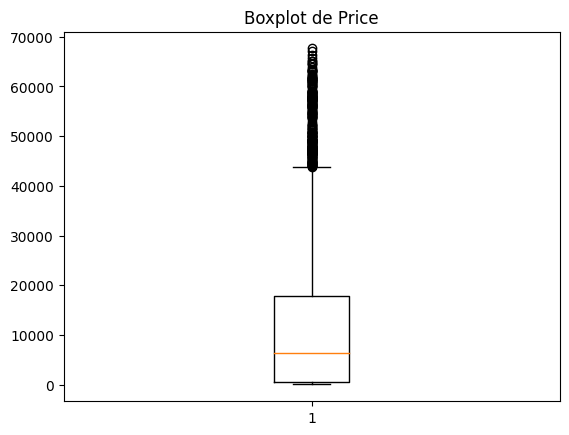

In [59]:
import matplotlib.pyplot as plt
plt.boxplot(coin_id_market_chart_bitcoin['price'])
plt.title('Boxplot de Price')
plt.show()

## Grafico de lineas dobles
para evidenciar como han evolucionado entre si el precio y la capitalizacion del mercado

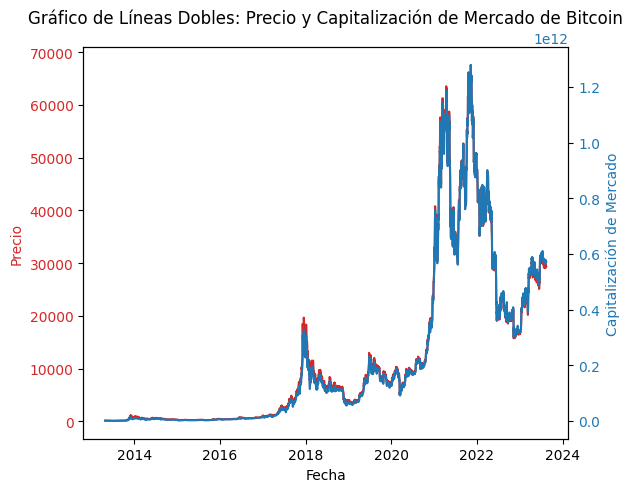

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_bitcoin['date'] = pd.to_datetime(coin_id_market_chart_bitcoin['date'])

# Crear el gráfico de líneas dobles
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio', color=color)
ax1.plot(coin_id_market_chart_bitcoin['date'], coin_id_market_chart_bitcoin['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eje y
color = 'tab:blue'
ax2.set_ylabel('Capitalización de Mercado', color=color)
ax2.plot(coin_id_market_chart_bitcoin['date'], coin_id_market_chart_bitcoin['market_cap'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el diseño del gráfico
plt.title('Gráfico de Líneas Dobles: Precio y Capitalización de Mercado de Bitcoin')
plt.show()

## Gráfico de Retorno Diario
Para calcular los retornos diarios del precio y vizulalizar cómo varían en función de los días.

C:\Users\Gio\AppData\Local\Temp\ipykernel_9980\2593173438.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()


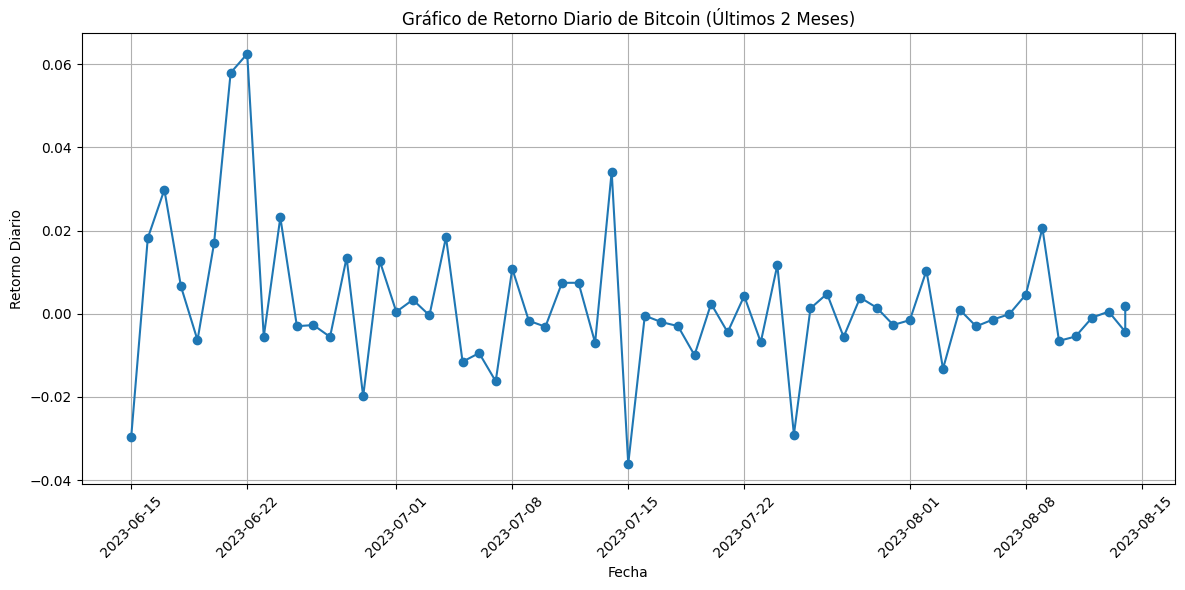

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_bitcoin['date'] = pd.to_datetime(coin_id_market_chart_bitcoin['date'])

# Obtener la fecha actual
current_date = pd.to_datetime('2023-08-14')  # Cambia la fecha a la actual si es necesario

# Calcular la fecha 6 meses antes de la fecha actual
six_months_ago = current_date - pd.DateOffset(months=2)

# Filtrar los datos para los últimos 6 meses
data_last_6_months = coin_id_market_chart_bitcoin[
    (coin_id_market_chart_bitcoin['date'] >= six_months_ago) &
    (coin_id_market_chart_bitcoin['date'] <= current_date)
]

# Calcular los retornos diarios del precio
data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()

# Crear el gráfico de retorno diario
plt.figure(figsize=(12, 6))
plt.plot(data_last_6_months['date'], data_last_6_months['daily_return'], marker='o')
plt.title('Gráfico de Retorno Diario de Bitcoin (Últimos 2 Meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gráfico de Precios y Volumen
Se combinan dos series de datos en un solo gráfico para ver cómo los precios y el volumen de negociación están relacionados.

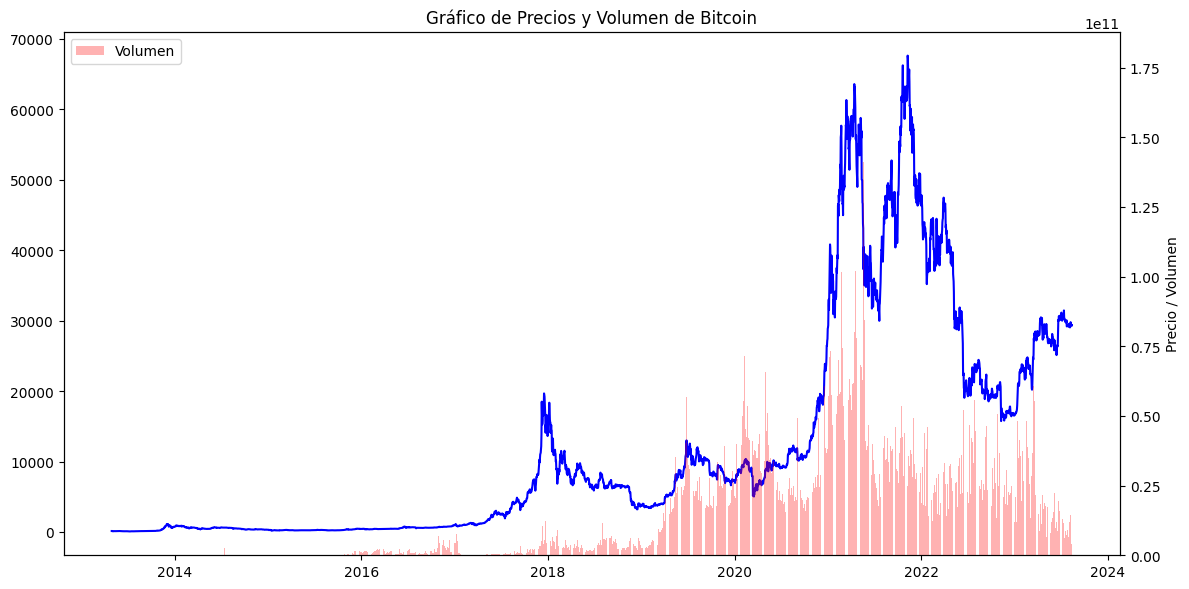

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_bitcoin['date'] = pd.to_datetime(coin_id_market_chart_bitcoin['date'])

# Crear el gráfico de precios y volumen combinados
plt.figure(figsize=(12, 6))

# Gráfico de precios (línea azul)
plt.plot(coin_id_market_chart_bitcoin['date'], coin_id_market_chart_bitcoin['price'], color='blue', label='Precio')

# Crear un segundo eje y para el volumen
plt.gca().twinx()

# Gráfico de volumen (barra roja)
plt.bar(coin_id_market_chart_bitcoin['date'], coin_id_market_chart_bitcoin['volume'], color='red', alpha=0.3, label='Volumen')

plt.title('Gráfico de Precios y Volumen de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio / Volumen')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [63]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_market_chart_bitcoin.to_excel("..\Data\Datos_Procesados\Bitcoin\coin_id_market_chart_bitcoin.xlsx", sheet_name="coin_id_market_chart_bitcoin.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [64]:
with open('..\Data\Fuente_json\Bitcoin\coin_id_ohlc_bitcoin.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_ohlc_bitcoin= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_ohlc_bitcoin)

                 0         1         2         3         4
0    1367280000000    135.30    141.96    135.30    135.30
1    1367539200000    117.00    117.00     91.01     91.01
2    1367884800000    111.25    118.33    106.40    106.40
3    1368230400000    112.64    118.78    112.64    113.01
4    1368576000000    114.71    117.18    114.16    114.16
..             ...       ...       ...       ...       ...
976  1690761600000  29200.24  29356.75  29200.24  29277.76
977  1691020800000  29233.14  29537.11  29146.64  29146.64
978  1691366400000  29176.15  29176.15  29044.20  29044.20
979  1691712000000  29178.15  29779.56  29178.15  29423.82
980  1692057600000  29396.85  29412.14  29284.97  29284.97

[981 rows x 5 columns]


In [65]:
coin_id_ohlc_bitcoin[0] = pd.to_datetime(coin_id_ohlc_bitcoin[0], unit='ms')

In [66]:
# cambiar nombre columna
coin_id_ohlc_bitcoin.rename(columns={0: 'Date', 1:'Open', 2:'High', 3:'Low', 4:'Close'}, inplace=True)

In [67]:
coin_id_ohlc_bitcoin

,Date,Open,High,Low,Close
0,2013-04-30,135.30,141.96,135.30,135.30
1,2013-05-03,117.00,117.00,91.01,91.01
2,2013-05-07,111.25,118.33,106.40,106.40
3,2013-05-11,112.64,118.78,112.64,113.01
4,2013-05-15,114.71,117.18,114.16,114.16
...,...,...,...,...,...
976,2023-07-31,29200.24,29356.75,29200.24,29277.76
977,2023-08-03,29233.14,29537.11,29146.64,29146.64
978,2023-08-07,29176.15,29176.15,29044.20,29044.20
979,2023-08-11,29178.15,29779.56,29178.15,29423.82


In [68]:
coin_id_ohlc_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    981 non-null    datetime64[ns]
 1   Open    981 non-null    float64       
 2   High    981 non-null    float64       
 3   Low     981 non-null    float64       
 4   Close   981 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 38.4 KB


In [69]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ohlc_bitcoin.to_excel("..\Data\Datos_Procesados\Bitcoin\coin_id_ohlc_bitcoin.xlsx", sheet_name="coin_id_ohlc_bitcoin.xlsx", index=False, float_format="%.2f")

In [70]:
with open('..\Data\Fuente_json\Bitcoin\companies_public_treasure_bitcoin.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
companies_public_treasure_bitcoin= pd.DataFrame(data)

# Imprimir el DataFrame
print(companies_public_treasure_bitcoin)

    total_holdings  total_value_usd  market_cap_dominance  \
0      232549.7158     6.825525e+09                   1.2   
1      232549.7158     6.825525e+09                   1.2   
2      232549.7158     6.825525e+09                   1.2   
3      232549.7158     6.825525e+09                   1.2   
4      232549.7158     6.825525e+09                   1.2   
5      232549.7158     6.825525e+09                   1.2   
6      232549.7158     6.825525e+09                   1.2   
7      232549.7158     6.825525e+09                   1.2   
8      232549.7158     6.825525e+09                   1.2   
9      232549.7158     6.825525e+09                   1.2   
10     232549.7158     6.825525e+09                   1.2   
11     232549.7158     6.825525e+09                   1.2   
12     232549.7158     6.825525e+09                   1.2   
13     232549.7158     6.825525e+09                   1.2   
14     232549.7158     6.825525e+09                   1.2   
15     232549.7158     6

In [71]:
# Crear un nuevo DataFrame a partir de la columna "companies"
companies_public_treasure_bitcoin2 = pd.DataFrame(companies_public_treasure_bitcoin['companies'].tolist())

# Mostrar el nuevo DataFrame
print(companies_public_treasure_bitcoin2)

                                name        symbol country  total_holdings  \
0                 MicroStrategy Inc.   NASDAQ:MSTR      US          152333   
1          Marathon Digital Holdings   NASDAQ:MARA      US           12964   
2            Galaxy Digital Holdings     TSE: GLXY      US           12545   
3               Coinbase Global, Inc   NASDAQ:COIN      US           10766   
4                        Tesla, Inc.   NASDAQ:TSLA      US           10500   
5                  Hut 8 Mining Corp    NASDAQ:HUT      CA            9315   
6                         Block Inc.       NYSE:SQ      US            8027   
7                Riot Platforms, Inc   NASDAQ:RIOT      US            7094   
8                    Hive Blockchain   NASDAQ:HIVE      CA            2332   
9                       NEXON Co Ltd      TYO:3659      JP            1717   
10               Voyager Digital LTD      CSE:VYGR      CA            1239   
11              Aker ASA (Seetee AS)       OL:AKER      NO      

In [72]:
companies_public_treasure_bitcoin2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        25 non-null     object 
 1   symbol                      25 non-null     object 
 2   country                     25 non-null     object 
 3   total_holdings              25 non-null     int64  
 4   total_entry_value_usd       25 non-null     int64  
 5   total_current_value_usd     25 non-null     int64  
 6   percentage_of_total_supply  25 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.5+ KB


## Gráfico de Barras
Para visualizar la distribución de las empresas por país y la cantidad total de holdings que tienen en la criptomoneda.

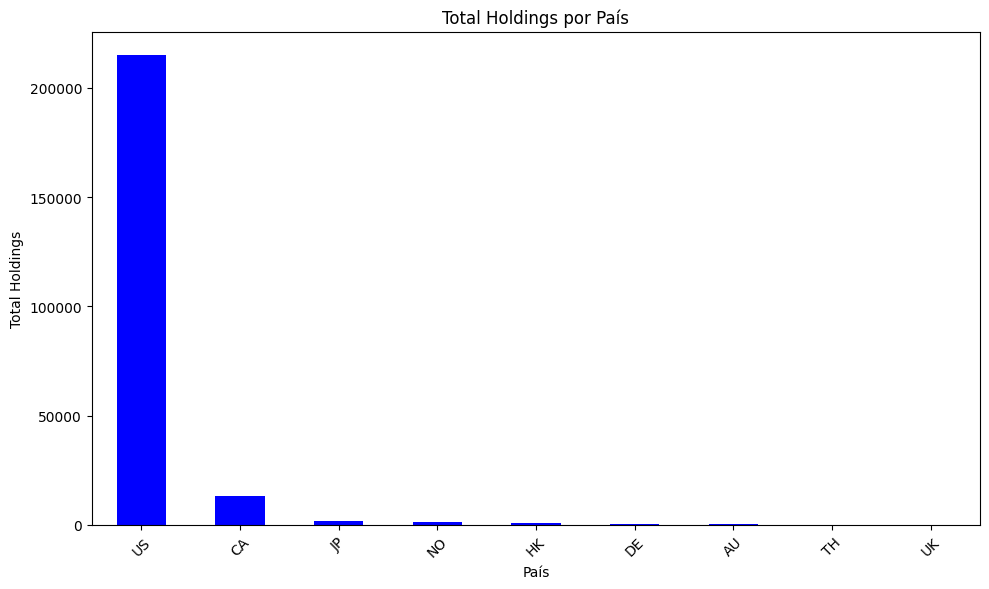

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por país y calcular la suma de total_holdings
holdings_by_country = companies_public_treasure_bitcoin2.groupby('country')['total_holdings'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
holdings_by_country.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Total Holdings por País')
plt.xlabel('País')
plt.ylabel('Total Holdings')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Gráfico de Barras
Para visualiza que porcentaje total del suministro de la criptomoneda posee la empresa.

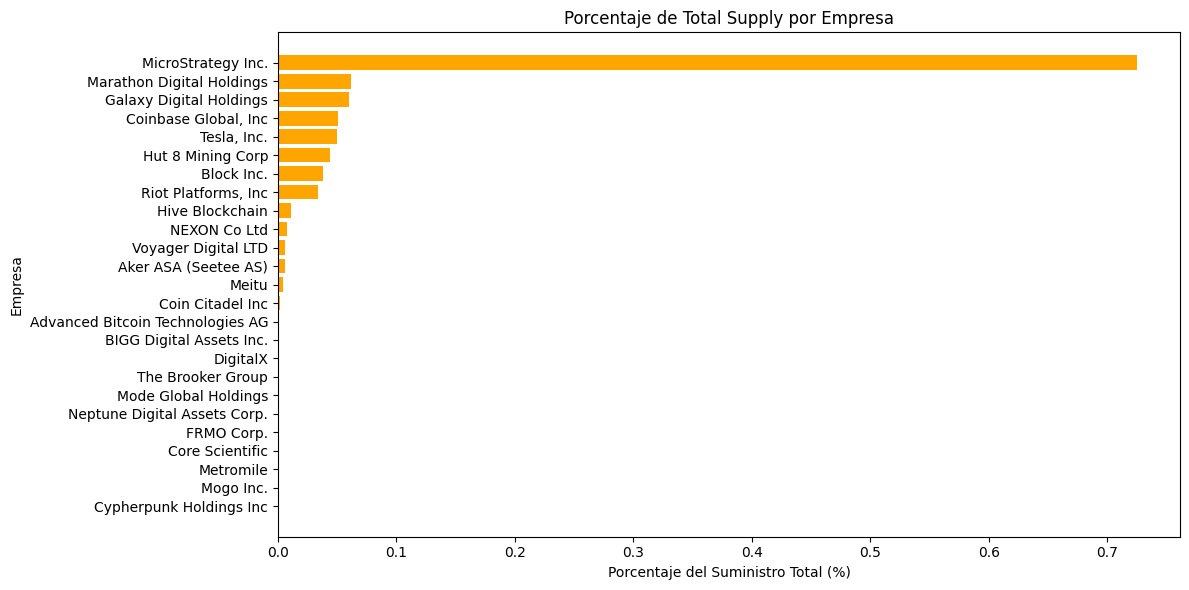

In [74]:
import pandas as pd
import matplotlib.pyplot as plt


# Crear el gráfico de barras para el porcentaje de total supply por empresa
plt.figure(figsize=(12, 6))
plt.barh(companies_public_treasure_bitcoin2['name'], companies_public_treasure_bitcoin2['percentage_of_total_supply'], color='orange')
plt.title('Porcentaje de Total Supply por Empresa')
plt.xlabel('Porcentaje del Suministro Total (%)')
plt.ylabel('Empresa')
plt.gca().invert_yaxis()  # Invertir el eje y para que las empresas con mayor porcentaje estén arriba
plt.tight_layout()

plt.show()

In [75]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
companies_public_treasure_bitcoin2.to_excel("..\Data\Datos_Procesados\Bitcoin\companies_public_treasure_bitcoin2.xlsx", sheet_name="companies_public_treasure_bitcoin2.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [76]:
# Crear un nuevo DataFrame con las columnas restantes
companies_public_treasure_bitcoin1 = companies_public_treasure_bitcoin.drop(columns=['companies'])

# Mostrar el nuevo DataFrame
print(companies_public_treasure_bitcoin1)

    total_holdings  total_value_usd  market_cap_dominance
0      232549.7158     6.825525e+09                   1.2
1      232549.7158     6.825525e+09                   1.2
2      232549.7158     6.825525e+09                   1.2
3      232549.7158     6.825525e+09                   1.2
4      232549.7158     6.825525e+09                   1.2
5      232549.7158     6.825525e+09                   1.2
6      232549.7158     6.825525e+09                   1.2
7      232549.7158     6.825525e+09                   1.2
8      232549.7158     6.825525e+09                   1.2
9      232549.7158     6.825525e+09                   1.2
10     232549.7158     6.825525e+09                   1.2
11     232549.7158     6.825525e+09                   1.2
12     232549.7158     6.825525e+09                   1.2
13     232549.7158     6.825525e+09                   1.2
14     232549.7158     6.825525e+09                   1.2
15     232549.7158     6.825525e+09                   1.2
16     232549.

In [77]:
companies_public_treasure_bitcoin1 = companies_public_treasure_bitcoin1.drop_duplicates()

In [78]:
companies_public_treasure_bitcoin1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_holdings        1 non-null      float64
 1   total_value_usd       1 non-null      float64
 2   market_cap_dominance  1 non-null      float64
dtypes: float64(3)
memory usage: 32.0 bytes


In [79]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
companies_public_treasure_bitcoin1.to_excel("..\Data\Datos_Procesados\Bitcoin\companies_public_treasure_bitcoin1.xlsx", sheet_name="companies_public_treasure_bitcoin1.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
